In [153]:
import pandas as pd
import numpy as np
import datetime
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df = pd.read_csv("US_Accidents_May19.csv")
df2 = df[["Severity","Start_Time","End_Time","Start_Lat","Start_Lng","Zipcode","State","Temperature(F)","Wind_Chill(F)","Humidity(%)","Pressure(in)","Visibility(mi)", "Wind_Speed(mph)","Precipitation(in)","Weather_Condition","Amenity","Bump","Crossing","Give_Way","Junction","No_Exit","Railway","Roundabout","Station","Stop","Traffic_Calming","Traffic_Signal","Turning_Loop"]]

In [155]:
df2["Start_Time"] = pd.to_datetime(df2["Start_Time"]) # change to datime format
df2["End_Time"] = pd.to_datetime(df2["End_Time"])
df2["Amenity"] = df2["Amenity"].astype('int64', copy=False) # change true->1 false->0
df2["Bump"] = df2["Bump"].astype('int64', copy=False)
df2["Crossing"] = df2["Crossing"].astype('int64', copy=False)
df2["Give_Way"] = df2["Give_Way"].astype('int64', copy=False)
df2["Junction"] = df2["Junction"].astype('int64', copy=False)
df2["No_Exit"] = df2["No_Exit"].astype('int64', copy=False)
df2["Railway"] = df2["Railway"].astype('int64', copy=False)
df2["Roundabout"] = df2["Roundabout"].astype('int64', copy=False)
df2["Station"] = df2["Station"].astype('int64', copy=False)
df2["Stop"] = df2["Stop"].astype('int64', copy=False)
df2["Traffic_Calming"] = df2["Traffic_Calming"].astype('int64', copy=False)
df2["Traffic_Signal"] = df2["Traffic_Signal"].astype('int64', copy=False)
df2["Turning_Loop"] = df2["Turning_Loop"].astype('int64', copy=False)

In [156]:
df2 = df2.dropna(subset=['Zipcode'])
df['Zipcode'] = df['Zipcode'].fillna(0) #fill NAN with 0
df2["Zipcode"] = df2["Zipcode"].str.replace('-','').astype('int64', copy=False)
# df2['Zipcode'] = pd.to_numeric(df2['Zipcode'], errors='coerce')


In [157]:
us_state_abbrev = {
    'AL':1,
    'AK':2,
    'AZ':3,
    'AR':4,
    'CA':5,
    'CO':6,
    'CT':7,
    'DE':8,
    'FL':9,
    'GA':10,
    'HI':11,
    'ID':12,
    'IL':13,
    'IN':14,
    'IA':15,
    'KS':16,
    'KY':17,
    'LA':18,
    'ME':19,
    'MD':20,
    'MA':21,
    'MI':22,
    'MN':23,
    'MS':24,
    'MO':25,
    'MT':26,
    'NE':27,
    'NV':28,
    'NH':29,
    'NJ':30,
    'NM':31,
    'NY':32,
    'NC':33,
    'ND':34,
    'OH':35,
    'OK':36,
    'OR':37,
    'PA':38,
    'RI':39,
    'SC':40,
    'SD':41,
    'TN':42,
    'TX':43,
    'UT':44,
    'VT':45,
    'VA':46,
    'WA':47,
    'WV':48,
    'WI':49,
    'WY':50,
}


In [158]:
df2['State'] = df['State'].fillna(0) #fill NAN with 0
df2['State'] = df2['State'].map(us_state_abbrev)

In [159]:
weather_map = {
    'Light Rain':1,
    'Overcast':2,
    'Mostly Cloudy':3,
    'Rain':4,
    'Light Snow':5,
    'Haze':6,
    'Scattered Clouds':7,
    'Partly Cloudy':8,
    'Clear':9,
    'Snow':10,
    'Light Freezing Drizzle':11,
    'Light Drizzle':12,
    'Fog':13,
    'Shallow Fog':14,
    'Heavy Rain':15,
    'Light Freezing Rain':16,
    'Drizzle':17,
    'Light Rain Showers':18
}

In [160]:
df2['Weather_Condition'] = df['Weather_Condition'].fillna(0) #fill NAN with 0
df2['Weather_Condition'] = df2['Weather_Condition'].map(weather_map)

In [161]:
df2.to_csv('preprocessed-file.csv', index=False)

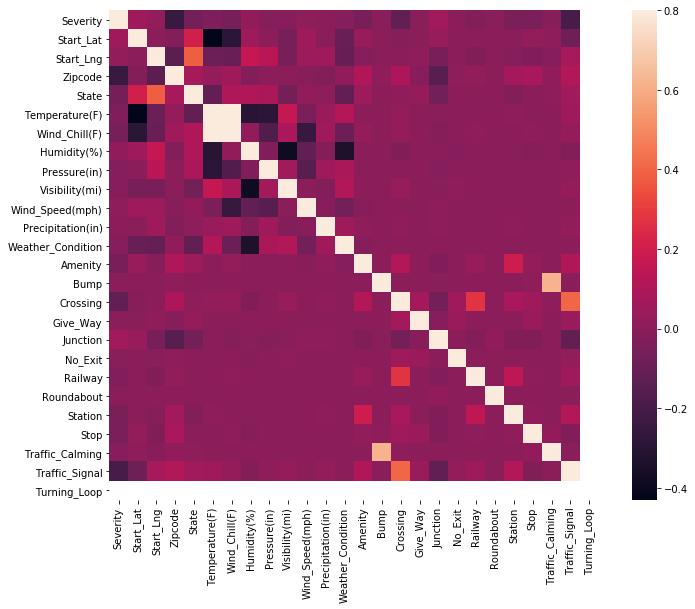

In [162]:
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()